Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [40]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Korisnik\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'f', 'clf', 'sum', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [41]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])



### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree=1)
Xp = poly.fit_transform(X)
print (Xp)
# Vaš kôd ovdje


[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [44]:
from numpy import linalg

In [45]:
Xt = np.transpose(Xp)

w = np.dot(np.dot(linalg.inv(np.dot(Xt, Xp)), Xt),y)
print(w) # Vaš kôd ovdje

w_ = np.matmul(linalg.pinv(Xp), y)

print(w_)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

[2.2        2.65714286 3.11428571 4.02857143]
2.0428571428571427
4.085714285714285


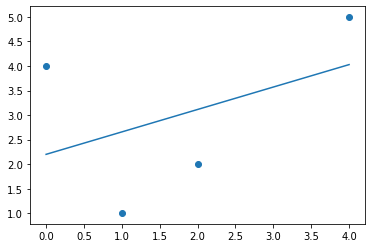

In [46]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt



h = np.dot(Xp,np.transpose(w))
print (h)

plt.scatter(X, y)
plt.plot(X, h)

sum = 0
for i in range(len(y)):
    sum+=np.power((y[i]-h[i]),2)
    
E = 0.5*sum

print (mse(y, h))
print (E)


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [47]:
# Vaš kôd ovdje
# w = np.dot(linalg.inv(Xp),y) | Nema inverza, jer matrica nije kvadratna

# Problem nastaje kada je broj primjera veći ili manji od broja parametara, 
# pa dolazi do preodređenosti ili pododređenosti sustava

# Javlja se i problem ako je Gramova matrica(konkretno Xp, još i matrica dizajna), manjeg ranga od n+1, a to
# se događa ako je broj primjera manji od broja značajki, ne možemo raditi na ovaj način nego treba raditi SVD


Xprosirena = PolynomialFeatures(degree=(len(X)-1)).fit_transform(X)
print (Xprosirena)

w_s_prosirenom = np.dot(linalg.inv(Xprosirena),y)
print (w_s_prosirenom)


[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Vaš kôd ovdje

reg = LinearRegression().fit(X, y)
# Slope i Intercept
print (reg.coef_)
print (reg.intercept_)

#Izračun pogreške
print (mse(y,reg.predict(X)))

[0.45714286]
2.2
2.042857142857143


In [50]:
# Probabilistička interpretacija korištenja MSE je da se maksimizira log vjerovatnost pojavljivanja 

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [51]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    Y_prob = []
    N =  50
    noise = np.random.normal(0, noise, N)
    
    for i in range(N):
        Y_prob.append(f(X[i])+noise[i])
    
    return Y_prob



In [52]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

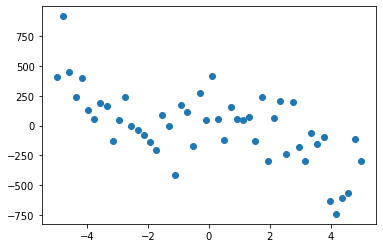

In [53]:
# Vaš kôd ovdje

X_uniform = make_instances(-5,5,50);
def f(x):
    return (5 + x - 2*np.power(x,2) - 5*np.power(x,3))

y = make_labels(X_uniform, f, 200)

plt.scatter(X_uniform, y)



### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

39365.793417914596


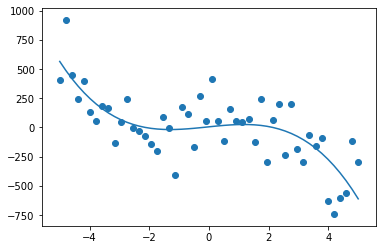

In [54]:
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=3)
Xp = poly.fit_transform(X_uniform)

w = np.dot(linalg.pinv(Xp), y)
yh = np.dot(Xp, (w))

plt.plot(X_uniform, yh)
plt.scatter(X_uniform, y)

print (mse(yh, y))


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.


**Q:** Koji model ima najmanju pogrešku učenja i zašto?

52723.31745784917
39365.793417914596
33337.414696683474
25938.730327139245
20694.571623215583


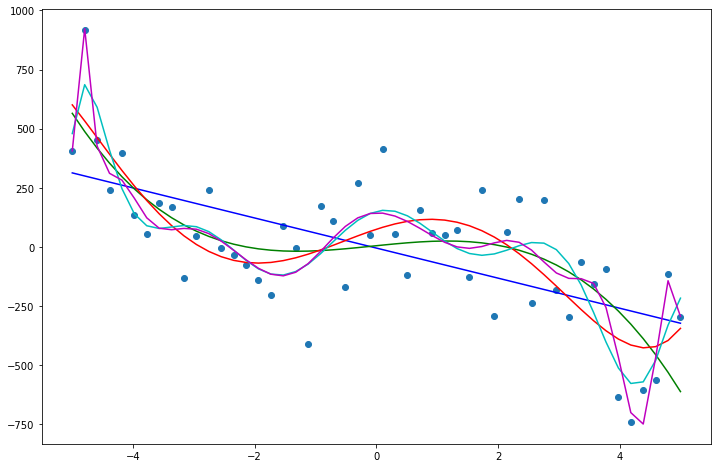

In [55]:

plt.figure(figsize=(12, 8))
plt.scatter(X_uniform, y)

color = ['b','g','r','c','m']

d = [1,3,5,10,20]

for i in range(len(d)):
    poly = PolynomialFeatures(degree=d[i])
    Xp = poly.fit_transform(X_uniform)
    w = np.dot(linalg.pinv(Xp), y)
    yh = np.dot(Xp, w)
    plt.plot(X_uniform, yh, color= color[i] )
    print (mse(y,yh))

    


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [56]:
from sklearn.model_selection import train_test_split

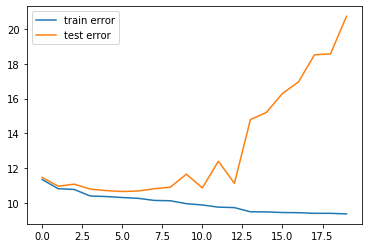

In [57]:
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X_uniform, y, test_size=0.5, random_state=3)
d = [x for x in range(20)]
testError = []
trainError = []

def train(degree, X, y) :
        poly = PolynomialFeatures(degree=degree)
        Xd = poly.fit_transform(X)
        w = np.dot(linalg.pinv(Xd), y)
        yh = np.dot(Xd, w) 
        return w, yh


def predict(degree, X, w ):
        poly = PolynomialFeatures(degree=degree)
        Xd = poly.fit_transform(X)
        yh_test = np.dot(Xd, w)
        return yh_test
    
for i in range(len(d)):
    w, yh_train = train(i, X_train, y_train)
    yh_test = predict(i, X_test, w)
    trainError.append(mse(y_train, yh_train))
    testError.append(mse(y_test,yh_test))

plt.plot(d, np.log(trainError), label = 'train error')
plt.plot(d, np.log(testError), label = 'test error')  
plt.legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

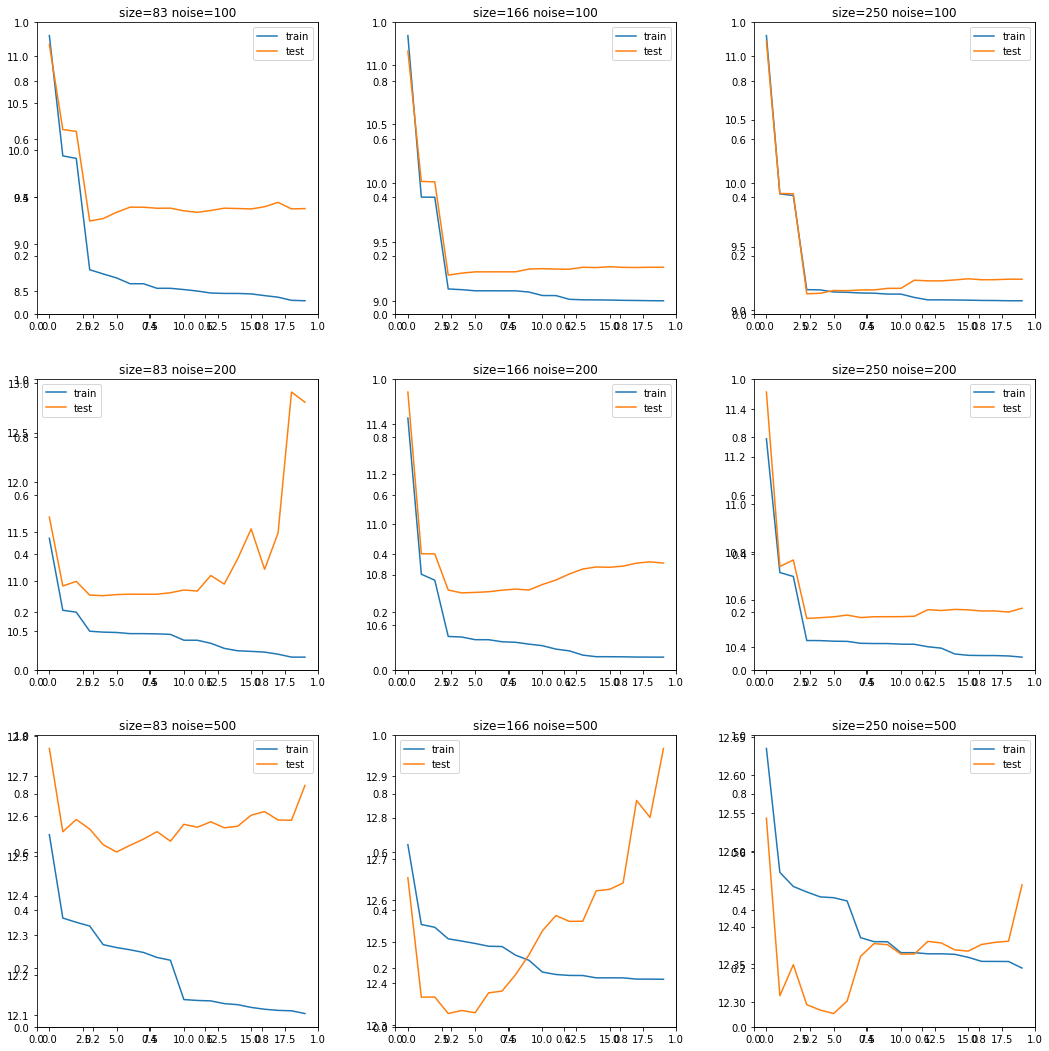

In [21]:
X = make_instances(-5, 5, 1000)

def make_labels2(X, f, noise=0):
    # Vaš kôd ovdje
    Y_prob = []
    N =  len(X)
    noise = np.random.normal(0, noise, N)
    
    for i in range(N):
        Y_prob.append(f(X[i])+noise[i])
    
    return Y_prob


fig, axes = subplots(3, 3)
fig.set_size_inches(15, 15)

for i, noise in enumerate([100, 200, 500]):
    
    y = make_labels2(X, f, noise)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    for j, factor in enumerate([1/3,2/3,1]):
       
        uzorkovanjeTrain = np.random.choice(range(500), int(factor*500//2),replace= False)
        uzorkovanjeTest = np.random.choice(range(500), int(factor*500//2), replace= False)
        train_error = []
        test_error = []
        
        for k in d:
            
            w, y_pred_train = train(k, X_train[uzorkovanjeTrain], y_train[uzorkovanjeTrain])
            y_pred_test = predict(k, X_test[uzorkovanjeTest], w)
            
            train_error.append(mse(y_train[uzorkovanjeTrain], y_pred_train))
            test_error.append(mse(y_test[uzorkovanjeTest], y_pred_test))
            
        
        ax = axes[i, j]
        
        fig.add_subplot(3, 3, i*3+j+1)
        plt.title("size={} noise={}".format(int(factor*500//2), noise))
        plt.plot(d, np.log(train_error), label="train")
        plt.plot(d, np.log(test_error),label="test")
        plt.legend()
            
plt.tight_layout()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [22]:
# Vaš kôd ovdje

# Što je lambda veći, više ćemo kaznjavati slozenost modela i imat cemo jednostavniji model 
# Wo nikada ne regulariziramo, jer on određuje početni pomak, npr. broj noge kod djeteta, itd

#q1 matrica je dimenzija m+1, m+1
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(degree=3)
Xp = poly.fit_transform(X)
print (Xp)
ls = [0, 1, 10]


def trainReg(Xp, ls, y):
    w = []
    for i in ls:
        w.append(np.dot(np.dot(linalg.inv(np.dot(np.transpose(Xp), Xp) + i*singularMatrix(len(Xp))), np.transpose(Xp)),y))
    return w


def singularMatrix(N):
    e = np.identity(N)
    e[0,0]=0
    return e
    
print (trainReg(Xp, ls,y))

#Razlika je očekivana, za težine nižeg faktora manja je linearnost i veća je vrijednost parametara w



[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[array([ 4.        , -5.91666667,  3.375     , -0.45833333]), array([ 3.05696145, -0.69079365, -0.2831746 ,  0.1445805 ]), array([ 2.49444184, -0.15897295, -0.13423067,  0.0815601 ])]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [23]:
from sklearn.linear_model import Ridge

In [24]:
# Vaš kôd ovdje
w = []

for i in ls:
    clf = Ridge(alpha=i, fit_intercept = False)
    w.append([clf.fit(Xp,y).coef_])

print (w)

[[array([ 4.        , -5.91666667,  3.375     , -0.45833333])], [array([ 1.79567372, -0.24729075, -0.0175289 ,  0.07014758])], [array([0.43312265, 0.11060671, 0.13827839, 0.03093411])]]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

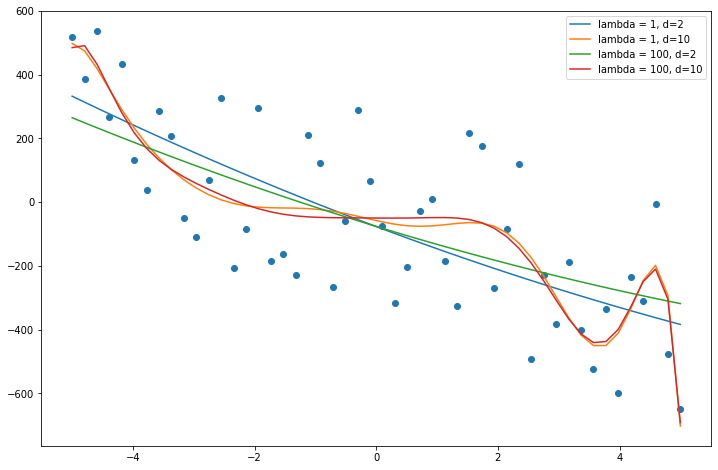

In [25]:
# Vaš kôd ovdje
# Vaš kôd ovdje


X_uniform = make_instances(-5,5,50);
y = make_labels2(X_uniform, f, 200);

plt.figure(figsize=(12, 8))
plt.scatter(X_uniform, y)



def trainReg(X, d, l, y):
    poly = PolynomialFeatures(d)
    Xp = poly.fit_transform(X)
    
    n = Xp.shape[1]
    w = np.dot(np.dot(linalg.inv(np.dot(np.transpose(Xp),(Xp))+l*singularMatrix(n)),np.transpose(Xp)),y)
    
    y_pred = np.dot(Xp,w)

    return w, y_pred

for l in [1,100]:
    for d in [2,10]:
        w, y_pred = trainReg(X_uniform,d,l,y)
        plt.plot(X_uniform, y_pred, label="lambda = {}, d={}".format(l,d))

plt.legend()




### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


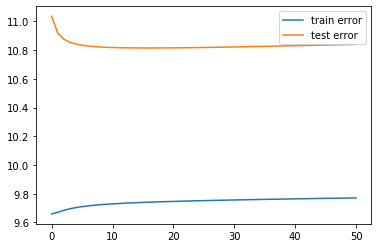

In [26]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X_uniform, y, test_size=0.5, random_state=3)
d=10
ls = [x for x in range(51)]
trainError = []
testError = []

def predict(degree, X, w):
        poly = PolynomialFeatures(degree=degree)
        Xd = poly.fit_transform(X)
        yh_test = np.dot(Xd, w)
        return yh_test
    
for i in range(len(ls)):
    w, yh_train = trainReg(X_train,d ,ls[i] ,y_train)
    yh_test = predict(d, X_test, w)
    trainError.append(mse(y_train, yh_train))
    testError.append(mse(y_test,yh_test))

plt.plot(ls, np.log(trainError), label = 'train error')
plt.plot(ls, np.log(testError), label = 'test error')  
plt.legend()


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [27]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

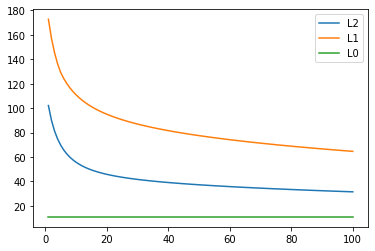

In [28]:
# Vaš kôd ovdje



ls = [x for x in range(1,101)]
d = 10
y = make_labels(X_uniform, f, 200);


L2 = np.array([])
L1 = np.array([])
L0 = np.array([])


for i in ls:
    w, yh_train = trainReg(X_uniform, d, i, y)
    L2 = np.append(L2, sqrt(np.dot(np.transpose(w),w)))
    L1 = np.append(L1, np.sum(np.absolute(w)))
    L0 = np.append(L0, nonzeroes(w))

plt.plot(ls, L2, label = 'L2')
plt.plot(ls, L1, label = 'L1')  
plt.plot(ls, L0, label = 'L0')

plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711799.5693471534, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 720061.7713534137, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727336.5926693365, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809740.8288388452, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809904.5060474591, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810097.3401456974, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816716.8379643438, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816795.7413733471, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816870.9228180385, tolerance: 523.5370735131951
  positive)
C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

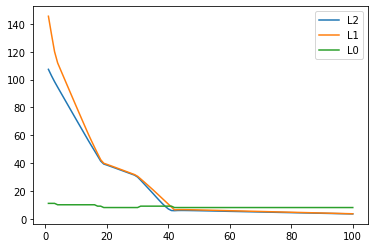

In [29]:
# Vaš kôd ovdje

from sklearn import linear_model
L1 = []
L2 = []
L0 = []

for i in ls:
    poly = PolynomialFeatures(degree=d)
    Xp = poly.fit_transform(X_uniform)
    clf = linear_model.Lasso(alpha=i, fit_intercept=False)
    clf.fit(Xp, y)
    w = clf.coef_
    
    L2.append(np.sqrt(w.transpose().dot(w)))
    L1.append(np.sum(np.abs(w)))
    L0.append(nonzeroes(w))
    


plt.plot(ls, L2, label = 'L2')
plt.plot(ls, L1, label = 'L1')  
plt.plot(ls, L0, label = 'L0')

plt.legend()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [30]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

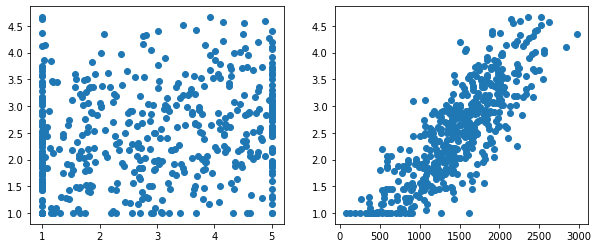

In [31]:
# Vaš kôd ovdje
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(grade_in_highschool, grades_y)
plt.subplot(1,2,2)
plt.scatter(exam_score, grades_y)

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [32]:
# Vaš kôd ovdje


clf = Ridge(alpha=0.01, fit_intercept = False).fit(grades_X, grades_y)

print (clf.coef_)


[0.00147711 0.1106004 ]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# Vaš kôd ovdje
scaler = StandardScaler()

scaled_values = scaler.fit_transform(np.c_[grades_X, grades_y])
grades_X_fixed = scaled_values[:,:2]
grades_y_fixed = scaled_values[:,2]

clf = Ridge(alpha=0.01, fit_intercept = False).fit(grades_X_fixed, grades_y_fixed)
print (clf.coef_)


[0.81630375 0.15167761]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [35]:
# Vaš kôd ovdje

grades_X_fixed_colinear = np.c_[grades_X_fixed,grades_X_fixed[:,1]]

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [36]:
# Vaš kôd ovdje
clf = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(clf.coef_)

[0.81630364 0.07583957 0.07583957]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [37]:
# Vaš kôd ovdje

w1 = np.array([])
w2 = np.array([])

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5, random_state=i)
    h1 = Ridge(alpha=0.01).fit(X_train, y_train)
    h2 = Ridge(alpha=1000).fit(X_train, y_train)
      
    if i == 0:
        w1 = h1.coef_
        w2 = h2.coef_
    else:
        w1 = np.vstack([w1, h1.coef_])
        w2 = np.vstack([w2, h2.coef_])

    print("h1: ", h1.coef_)
    print("h2: ", h2.coef_)
    print()

print("w1 ")    
for i in range(3):
    print(np.std(w1[:,i:(i+1)]))
print ("w2")
for i in range(3):
    print(np.std(w2[i]))

h1:  [0.82023032 0.0493564  0.0493564 ]
h2:  [0.16383113 0.02063901 0.02063901]

h1:  [0.8219932  0.08310772 0.08310772]
h2:  [0.1621308 0.0366768 0.0366768]

h1:  [0.83774111 0.06622437 0.06622437]
h2:  [0.16935196 0.02574843 0.02574843]

h1:  [0.81101722 0.06279006 0.06279006]
h2:  [0.1632648  0.03348471 0.03348471]

h1:  [0.80490258 0.09372304 0.09372304]
h2:  [0.15109372 0.03753702 0.03753702]

h1:  [0.82136133 0.07939317 0.07939317]
h2:  [0.15347615 0.03440174 0.03440174]

h1:  [0.8242167  0.07754299 0.07754299]
h2:  [0.16790248 0.03656925 0.03656925]

h1:  [0.81334082 0.08100446 0.08100446]
h2:  [0.1662123  0.03724728 0.03724728]

h1:  [0.81385506 0.07171183 0.07171183]
h2:  [0.17391829 0.03713367 0.03713367]

h1:  [0.79055147 0.08662687 0.08662687]
h2:  [0.16097269 0.03725483 0.03725483]

w1 
0.011958118130212024
0.012278326284610893
0.012278326284729486
w2
0.06750141379409505
0.0591395803759234
0.06769535476135548


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [38]:
# Vaš kôd ovdje

for i in [0.01, 10]:
    print(linalg.cond(np.dot(np.transpose(grades_X_fixed_colinear),(grades_X_fixed_colinear))+i*singularMatrix(3)))

100542.85592735428
101.53146069838179


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  

In [39]:
from IPython.display import Javascript
display(Javascript('IPython.notebook.execute_cells_above()'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>